### Densidad de estados

La densidad de estados (DOS) describe el número de estados electrónicos disponibles en un valor de energía fijo.

In [1]:
from pylab import *

In [2]:
%matplotlib inline
%matplotlib inline

Para la monocapa de grafeno, primero definimos una función que establece una trayectoria en la 1BZ y otra que calculará los eigenvalores del sistema para un determinado número de puntos en el espacio recíproco:

In [3]:
%%time
n  = 1000
kx = np.linspace(0,1,n)
ky = np.linspace(0,1,n)
KX, KY = np.meshgrid(kx,ky)

KX = KX.reshape(n*n,)
KY = KY.reshape(n*n,)
kpts = column_stack((KX,KY))

d = 1.42 #Angstrom

b1=4*pi/3/d*array([ sqrt(3)/2   ,   0.5])
b2=4*pi/3/d*array([-sqrt(3)/2   ,   0.5])

bvec = array([b1,b2])

kpuntos = dot(kpts,bvec)

CPU times: user 30.5 ms, sys: 4.84 ms, total: 35.3 ms
Wall time: 63.4 ms


In [4]:
def getEigenSLG(k): 
    d = 1.42 #Angstrom
    fk = np.sqrt( 4*np.cos(np.sqrt(3)/2*d*k[0])*np.cos(3/2*d*k[1]) + 2*np.cos(np.sqrt(3)*d*k[0]) + 3 )
    t  = 2.97 #eV
    H  = np.array([[ 0 , -t*fk],[-t*fk , 0]])
    x = linalg.eigvals(H)
    return x.real

In [5]:
from multiprocessing import Pool

In [6]:
p  = Pool()
Ek = p.map(getEigenSLG,kpuntos)
Ek = array(Ek)

In [7]:
Ek = Ek.flatten()

Ya que tenemos los eigenvalores, podemos calular la DOS mediante la elaboración de un histograma o con ayuda de la función de Green. A continuación, se muestra un ejemplo de cada uno de los métodos propuestos:

#### Histograma

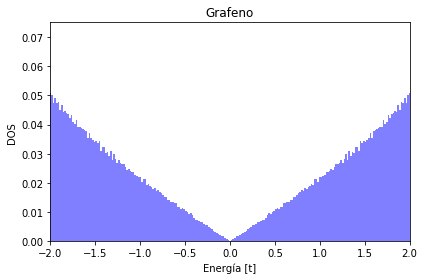

In [8]:
fig, ax = plt.subplots()
ax.hist(Ek,1001,range=(-9.1,9.1),density=True,color="blue",alpha=0.5)

ax.set_title("Grafeno")
ax.set_xlabel("Energía [t]")
ax.set_ylabel("DOS")

ax.set_xlim(-2,2)
ax.set_ylim(0,0.075)

fig.tight_layout()
fig.savefig("graphene_dos.pdf")

#### Función de Green

In [9]:
t  = 2.97
E = linspace(-3*t,3*t,1000)
η = 0.1
z = E+1J*η

In [10]:
G = zeros(len(z),dtype=complex)
for n in range(len(z)):
    G[n] = sum( 1/(z[n]-Ek) )

In [11]:
G /= len(Ek)

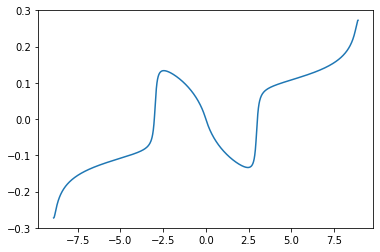

In [12]:
plot(z.real,G.real)

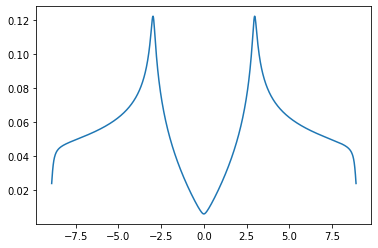

In [13]:
plot(z.real,-G.imag/pi)